# Verification of Linear Regression (선형 회귀 모델 검증하기)

## Contents
1. 결정계수 ($R^2$)
2. 선형 회귀모델 가설 검증하기
3. Residual plot 이용하여 회귀적합성 검증하기

---
# 1. 결정계수 ($R^2$)
### $R^2$를 구하는 방법
1. Pearson의 상관계수 (r)을 제곱한다. $$\frac{Cov(X,Y)}{\sqrt{Var(X)}\sqrt{Var(Y)}}$$
2. ANOVA notation으로는 다음과 같다. $$1- \frac{SSE}{SSTO}$$

### $R^2$의 성질
1. $-1 \leq R \leq 1$
2. $R>0$이면 양의 상관관계, $R<0$이면 음의 상관관계
3. $|R| \approx 1$일수록 상관관계가 크다.

### R에서 $R^2$ 보기
```summary()```함수로 lm 객체를 요약해서 보면 알 수 있다.

Multiple R-squared와 Adjusted R-squared를 확인한다.

In [3]:
str(mtcars)
Lm <- lm(mpg ~ hp, data=mtcars)
summary(Lm)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...



Call:
lm(formula = mpg ~ hp, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7121 -2.1122 -0.8854  1.5819  8.2360 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 30.09886    1.63392  18.421  < 2e-16 ***
hp          -0.06823    0.01012  -6.742 1.79e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.863 on 30 degrees of freedom
Multiple R-squared:  0.6024,	Adjusted R-squared:  0.5892 
F-statistic: 45.46 on 1 and 30 DF,  p-value: 1.788e-07


---
# 2. 선형 회귀모델 가설 검정하기
$H_0$ : $\beta_1 = 0$ 
$H_1$ : $\beta_1 \neq 0$ 
와 같이 가설을 세우고 F test 결과를 살펴본다.

R에서 ```sumary()```함수로 lm 객체의 p-value를 확인한다.

In [2]:
summary(Lm)


Call:
lm(formula = mpg ~ hp, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7121 -2.1122 -0.8854  1.5819  8.2360 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 30.09886    1.63392  18.421  < 2e-16 ***
hp          -0.06823    0.01012  -6.742 1.79e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.863 on 30 degrees of freedom
Multiple R-squared:  0.6024,	Adjusted R-squared:  0.5892 
F-statistic: 45.46 on 1 and 30 DF,  p-value: 1.788e-07


p-value가 0.5보다 작다면 $H_0$를 기각하여, 이 회귀모델은 적합하다고 통계적으로 말할 수 있다.

$\beta_1$의 신뢰구간을 알아보기 위해서는 ```confint()``` 함수를 이용한다.

이용법: ```confint(object, parm, level = 0.95, …)```

In [3]:
confint(Lm)

,2.5 %,97.5 %
(Intercept),26.76194879,33.4357723
hp,-0.08889465,-0.0475619


---
# 3. Residual plot 이용하여 회귀적합성 검증하기
앞서 살펴본 $R^2$ 값이 같더라도 데이터가 선형회귀분석에 적합하지 않을 수 있다.

이를 알아보기 위해 $$Residual_i = y_i - \hat{y_i}$$로 정의하고, residual plot을 그려본다.

가장 적합한 모델은 residual의 평균이 0에 가까우며 정규분포를 따르는 것이다.

R에서 ```plot(lm 객체)```를 입력하여 residual plot을 볼 수 있다.

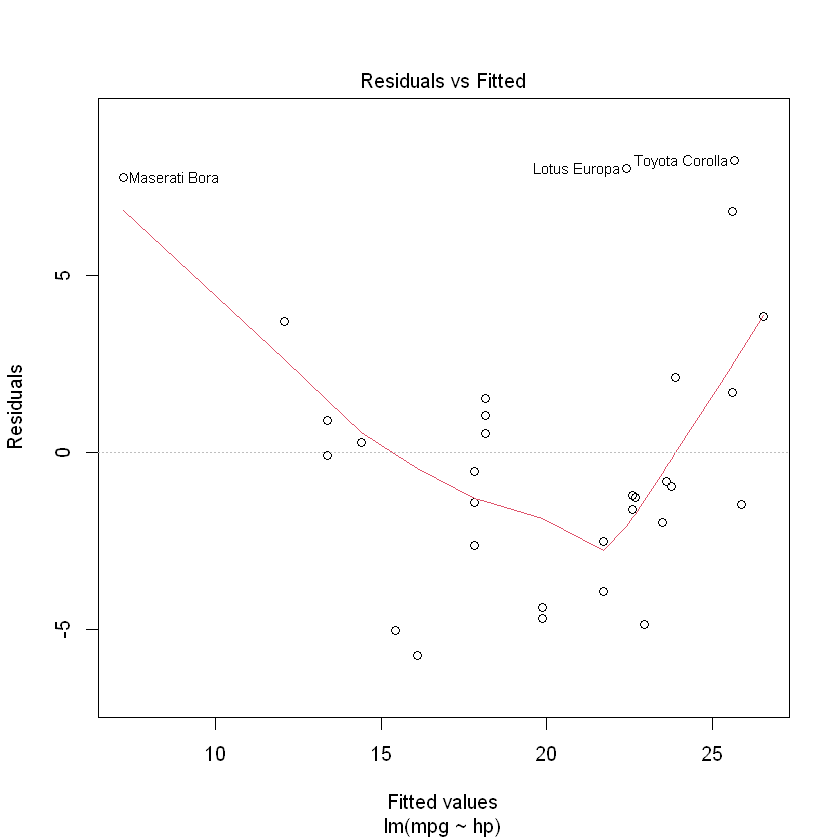

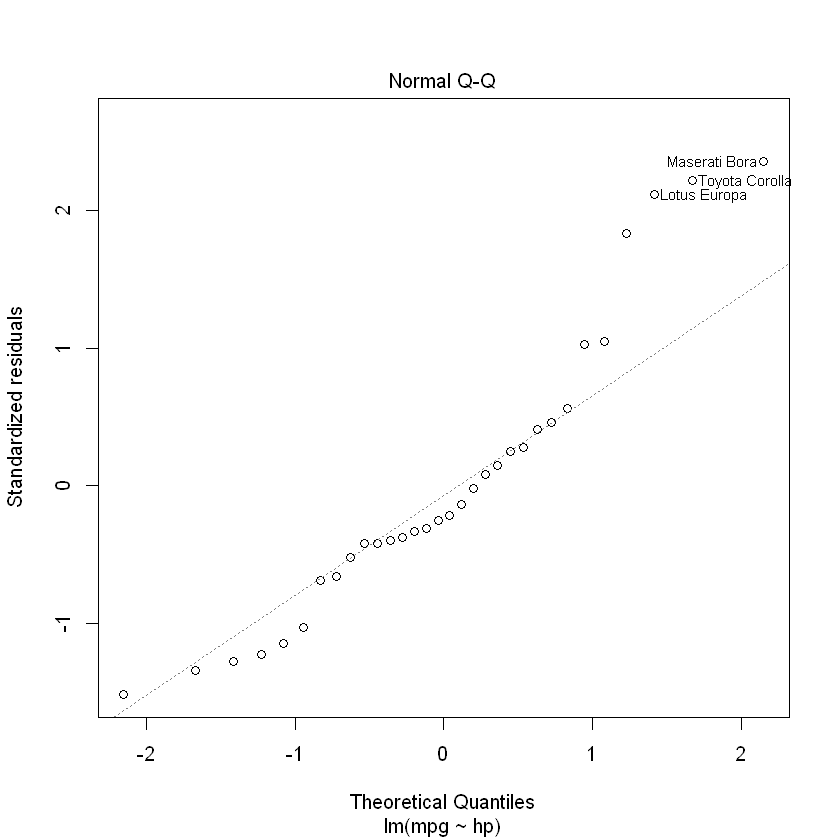

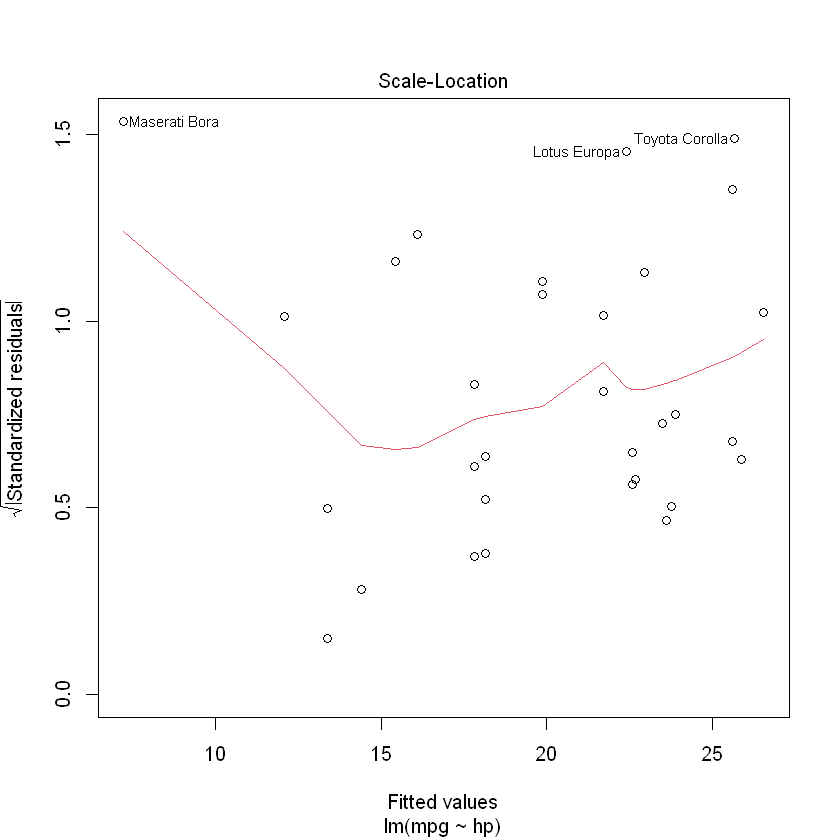

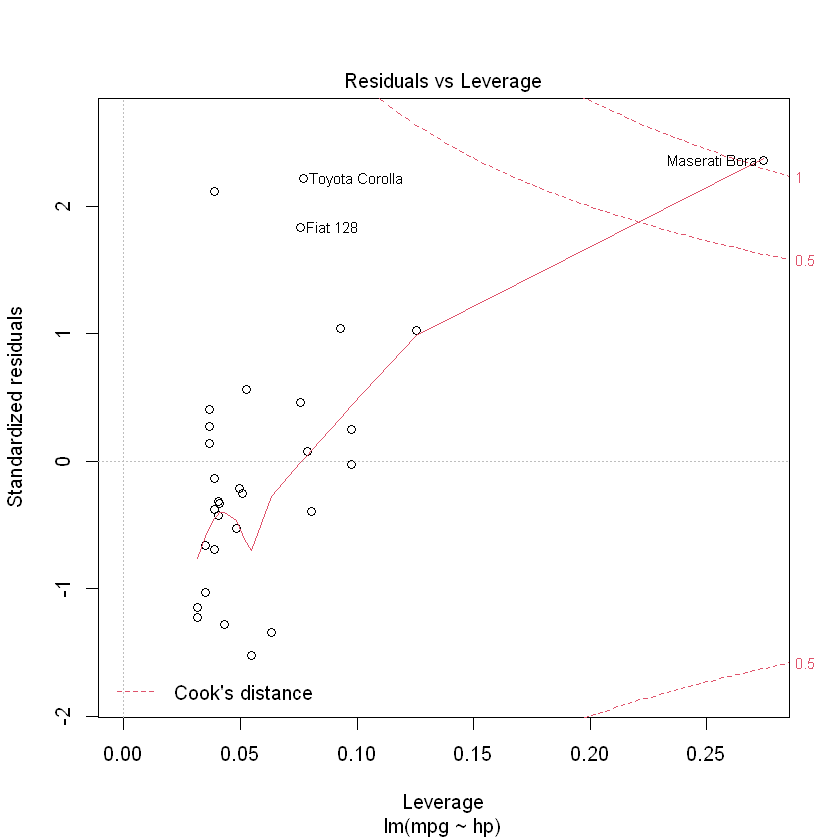

In [4]:
#par(mfrow=c(2,2)) #4개 그래프를 한꺼번에 보기
plot(Lm)

1. 첫번째(좌측 상단) 그래프는 fitted value 각각에 대한 Residual값과 평균선을 보여준다.
2. 두번째(우측 상단) 그래프는 residual에 대한 정규분포의 분위수-분위수 그래프 (Normal Q-Q plot)이다. 
   * 주어진 데이터가 정규분포 형태라면 점선위에 점들이 놓이게 된다.
3. 세번째(좌측 하단) 그래프는 residual에서 개선된 standardized residual에 제곱근을 씌운 값을 표현한 것이다.
   * 잔차가 골고루 퍼져 있을수록 좋다.
4. 네번째(우측 하단) 그래프는 영향점, 이상점 판별을 도와주는 Residual vs Leverage plot으로 Cook's distance를 측정한다.
   * Cook's distance 값이 1을 넘는 관측치를 영향점(Influence points)로 판별한다. 등고선의 1 이상인 영역에 있는 점은 확실한 이상점이다.